In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import requests
import json
from census import Census
import gmaps

# Import API key
from config import g_key


ModuleNotFoundError: No module named 'config'

In [7]:
# Import the fast food data file 
fastfood_data = pd.read_csv('resources/clean_fast_food.csv')
fastfood_data


,Index,Address,Category,City,Country,Latitude,Longitude,Name,ZipCode,State
0,0,800 N Canal Blvd,American Restaurant and Fast Food Restaurant,Thibodaux,US,29.814697,-90.814742,SONIC Drive In,70301,Louisiana
1,2,206 Wears Valley Rd,Fast Food Restaurant,Pigeon Forge,US,35.803788,-83.580553,Taco Bell,37863,Tennessee
2,3,3652 Parkway,Fast Food,Pigeon Forge,US,35.782339,-83.551408,Arby's,37863,Tennessee
3,4,2118 Mt Zion Parkway,Fast Food Restaurant,Morrow,US,33.562738,-84.321143,Steak 'n Shake,30260,Georgia
4,5,9768 Grand River Ave,Fast Food Restaurant,Detroit,US,42.368823,-83.138251,Wendy's,48204,Michigan
...,...,...,...,...,...,...,...,...,...,...
9297,9995,3460 Robinhood Rd,Fast Food Restaurants,Winston-Salem,US,36.117563,-80.316553,Pizza Hut,27106,North Carolina
9298,9996,3069 Kernersville Rd,Fast Food Restaurants,Winston-Salem,US,36.077718,-80.176748,Pizza Hut,27107,North Carolina
9299,9997,838 S Main St,Fast Food Restaurants,Kernersville,US,36.111015,-80.089165,Pizza Hut,27284,North Carolina
9300,9998,1702 Glendale Dr SW,Fast Food Restaurants,Wilson,US,35.719981,-77.945795,Pizza Hut,27893,North Carolina


In [8]:
# Import the combined fast food - obesity - population data file 
combined_fastfood= pd.read_csv('resources/clean_all_combined.csv')
combined_fastfood


,Address,Category,City,Country,Latitude,Longitude,Name,ZipCode,State,Prevalence,95% CI,Total Population
0,800 N Canal Blvd,American Restaurant and Fast Food Restaurant,Thibodaux,US,29.814697,-90.814742,SONIC Drive In,70301,Louisiana,38.1,"(36.2, 40.1)",2073200
1,1737 N University Ave,Fast Food Restaurants,Lafayette,US,30.252668,-92.037149,McDonald's,70507,Louisiana,38.1,"(36.2, 40.1)",2073200
2,1051 W Maple Ave,Fast Food Restaurants,Eunice,US,30.486970,-92.426480,Krispy Krunchy Chicken,70535,Louisiana,38.1,"(36.2, 40.1)",2073200
3,3000 Maplewood Dr,Fast Food Restaurants,Sulphur,US,30.227514,-93.343155,Pizza Hut,70663,Louisiana,38.1,"(36.2, 40.1)",2073200
4,6464 Siegen Ln,Fast Food Restaurants,Baton Rouge,US,30.390990,-91.061560,Arby's,70809,Louisiana,38.1,"(36.2, 40.1)",2073200
...,...,...,...,...,...,...,...,...,...,...,...,...
9297,850 Manton Ave,Fast Food Restaurants,Providence,US,41.832526,-71.465840,Wendy's,2909,Rhode Island,30.1,"(28.2, 32.1)",483474
9298,580 Chalkstone Ave,Fast Food Restaurants,Providence,US,41.834918,-71.426043,Pizza Hut,2908,Rhode Island,30.1,"(28.2, 32.1)",483474
9299,4000 Chapel View Boulevard,Fast Food Restaurants,Cranston,US,41.756170,-71.458551,Panera Bread,2920,Rhode Island,30.1,"(28.2, 32.1)",483474
9300,650 Bald Hill Rd,Fast Food Restaurants,Warwick,US,41.720180,-71.483700,SUBWAY,2886,Rhode Island,30.1,"(28.2, 32.1)",483474


In [9]:
# Configure gmaps
gmaps.configure(api_key=g_key)

NameError: name 'g_key' is not defined

In [10]:
obesity_data= pd.read_csv('resources/obesity_data_state_2020.csv')


In [11]:
# Build a dataframe that has city, lat and long. Remove the dups. 
locations = fastfood_data[["City", "Latitude", "Longitude"]].drop_duplicates()


In [12]:
#Group the fast food data by city and count the number of fast food places in each city. 
fast_food_totals = fastfood_data.groupby("City")[['Index']].count()
fast_food_totals

,Index
City,
Aberdeen,6
Abilene,6
Abingdon,2
Abington,1
Acton,1
...,...
Zachary,1
Zanesville,4
Zebulon,1


In [13]:
#rename the index column to the fast food count 
fast_food_totals.rename(columns = {'Index' : 'Fast Food Count'}, inplace = True)


In [14]:
# create a data frame that has city, fast food count, lat and long - merging the grouped df with the locations
fast_food_by_city= pd.merge(fast_food_totals, locations, how = 'right', on = 'City')
fast_food_by_city.head(30)

,City,Fast Food Count,Latitude,Longitude
0,Thibodaux,4,29.814697,-90.814742
1,Pigeon Forge,4,35.803788,-83.580553
2,Pigeon Forge,4,35.782339,-83.551408
3,Morrow,4,33.562738,-84.321143
4,Detroit,15,42.368823,-83.138251
5,Detroit,15,42.416819,-83.180444
6,Oceanside,7,33.205722,-117.288645
7,Riverhead,2,40.937359,-72.650142
8,Monahans,1,31.580721,-102.891455
9,Mabank,2,32.366020,-96.103364


In [15]:
#prep the parameters for teh heat map 
locations = fast_food_by_city[["Latitude", "Longitude"]]
ff_count = fast_food_by_city["Fast Food Count"].astype(float)

In [16]:

# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=ff_count, 
                                 dissipating=False, max_intensity=200,
                                 point_radius=1)

# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

Text(0.5, 1.0, 'Fast Food and Obesity Rates by State')

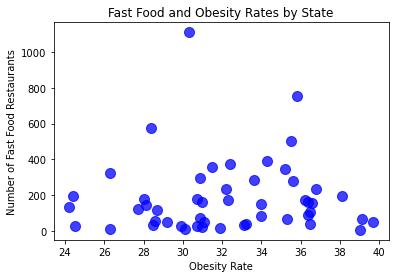

In [21]:
#Julia work - fast food quantity by obesity by state

#group combined df by date
fast_food_restaurant = combined_fastfood.groupby("State")

#find count of fast food chain by state
fast_food_count = fast_food_restaurant["Name"].count()
fast_food_count

#remove state duplicates from combined data
clean_combined_obesity = combined_fastfood.drop_duplicates('State')

#group cleaned dats by state
clean_obesity_group = clean_combined_obesity.groupby("State")

#find obesity rate per state
obesity_rate = clean_obesity_group['Prevalence'].mean()
obesity_rate

plt.scatter(obesity_rate, fast_food_count, marker ="o", facecolors="blue", s=100, alpha=0.75)
plt.xlabel("Obesity Rate")
plt.ylabel("Number of Fast Food Restaurants")
plt.title("Fast Food and Obesity Rates by State")

Text(0, 0.5, 'Obesity Rate')

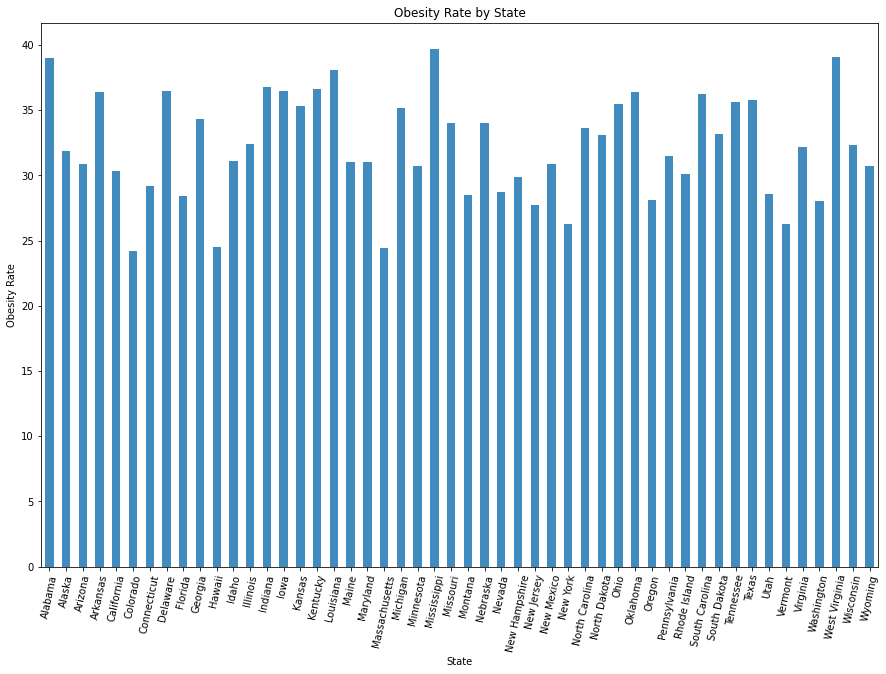

In [18]:
#empty list for state
states_count = [combined_fastfood["State"].nunique()]

Obesity_by_state = obesity_rate.plot(kind="bar", title= "Obesity Rate by State", alpha=0.85, rot=78, 
                                     width =0.5, figsize = (15, 10))
Obesity_by_state.set_xlabel("State")
Obesity_by_state.set_ylabel("Obesity Rate")


In [ ]:
#Julia work - fast food quantity by obesity by state

In [ ]:
#Nicole Work - fast food per capita